In [184]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib as plt 
from sklearn.metrics import mean_squared_error

In [185]:
data = pd.read_csv('BlackFriday.csv')
data.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,NaN,NaN,8370
1,1000001,P00248942,F,0-17,10,A,2,0,1,6.0,14.0,15200
2,1000001,P00087842,F,0-17,10,A,2,0,12,NaN,NaN,1422
3,1000001,P00085442,F,0-17,10,A,2,0,12,14.0,NaN,1057
4,1000002,P00285442,M,55+,16,C,4+,0,8,NaN,NaN,7969


In [186]:
data['Age'].value_counts()

26-35    214690
36-45    107499
18-25     97634
46-50     44526
51-55     37618
55+       20903
0-17      14707
Name: Age, dtype: int64

In [187]:
data[(data['Gender'] == 'M') & (data['City_Category'] == 'A')].value_counts

<bound method DataFrame.value_counts of         User_ID Product_ID Gender    Age  Occupation City_Category  \
5       1000003  P00193542      M  26-35          15             A   
9       1000005  P00274942      M  26-35          20             A   
10      1000005  P00251242      M  26-35          20             A   
11      1000005  P00014542      M  26-35          20             A   
12      1000005  P00031342      M  26-35          20             A   
...         ...        ...    ...    ...         ...           ...   
537566  1004736  P00048742      M  18-25          20             A   
537567  1004736  P00157542      M  18-25          20             A   
537568  1004736  P00250642      M  18-25          20             A   
537569  1004736  P00023142      M  18-25          20             A   
537570  1004736  P00162442      M  18-25          20             A   

       Stay_In_Current_City_Years  Marital_Status  Product_Category_1  \
5                               3             

In [188]:
data['Age'].value_counts()

26-35    214690
36-45    107499
18-25     97634
46-50     44526
51-55     37618
55+       20903
0-17      14707
Name: Age, dtype: int64

In [189]:
count = len(data[(data['Gender'] == 'F') & (data['Age'] == '46-50') & (data['Purchase'] > 20000)])
count

270

In [190]:
data['Product_Category_3']

0          NaN
1         14.0
2          NaN
3          NaN
4          NaN
          ... 
537572     NaN
537573    16.0
537574     NaN
537575     NaN
537576     NaN
Name: Product_Category_3, Length: 537577, dtype: float64

In [191]:
data.iloc[0]['Product_Category_3']

nan

In [192]:
len(data[(data['Product_Category_3'] == 'nan')])

0

In [193]:
data.shape

(537577, 12)

In [194]:
female_more36 = data['Age'].isin(['36-45', '46-50', '51-55', '55+']) & (data['Gender'] == 'F')
mans25_35 = (data['Gender'] == 'M') & (data['Age'] == '26-35')

In [195]:
perc = len(data[mans25_35 | female_more36]) / data.shape[0]
perc

0.4077201963625676

In [196]:
s1 = np.array([25, 60, 32, 16, 21])
s2 = np.array([30, 59, 36, 22, 22])
x = 0
for i in range(len(s1)):
	x += (s1[i] - s2[i])**2
print(x/len(s1))
np.mean((s1-s2)**2)

15.8


15.8

In [197]:
mse = mean_squared_error(s1, s2)
mse

15.8

In [198]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, roc_auc_score, precision_score, recall_score

# Data
data = pd.read_csv('telecom_churn.csv')
X = data.drop(columns='Churn')
y = data['Churn']
X_train, X_valid, y_train, y_valid = train_test_split(X, y, train_size=0.25)

# Model
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)
preds_valid = knn.predict(X_valid)

# Testing
Accuracy = accuracy_score(y_valid, preds_valid)
Precision = precision_score(y_valid, preds_valid)
Recall = recall_score(y_valid, preds_valid) 
Roc_auc = roc_auc_score(y_valid, preds_valid)
print(f'Accuracy = {Accuracy}\nPrecision = {Precision}\nRecall = {Recall}\nRoc_auc = {Roc_auc}')

Accuracy = 0.8528
Precision = 0.46496815286624205
Recall = 0.20448179271708683
Roc_auc = 0.5826422029381048


In [199]:
X.describe()

,AccountWeeks,ContractRenewal,DataPlan,DataUsage,CustServCalls,DayMins,DayCalls,MonthlyCharge,OverageFee,RoamMins
count,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000
mean,101.064806,0.903090,0.276628,0.816475,1.562856,179.775098,100.435644,56.305161,10.051488,10.237294
std,39.822106,0.295879,0.447398,1.272668,1.315491,54.467389,20.069084,16.426032,2.535712,2.791840
min,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,14.000000,0.000000,0.000000
25%,74.000000,1.000000,0.000000,0.000000,1.000000,143.700000,87.000000,45.000000,8.330000,8.500000
50%,101.000000,1.000000,0.000000,0.000000,1.000000,179.400000,101.000000,53.500000,10.070000,10.300000
75%,127.000000,1.000000,1.000000,1.780000,2.000000,216.400000,114.000000,66.200000,11.770000,12.100000
max,243.000000,1.000000,1.000000,5.400000,9.000000,350.800000,165.000000,111.300000,18.190000,20.000000


In [200]:
X.isna().sum() # Пропущенные значения 

AccountWeeks       0
ContractRenewal    0
DataPlan           0
DataUsage          0
CustServCalls      0
DayMins            0
DayCalls           0
MonthlyCharge      0
OverageFee         0
RoamMins           0
dtype: int64

In [201]:
# Стандартизация признаков 
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X_train, y_train)
X_train_normed = scaler.transform(X_train)
X_valid_normed = scaler.transform(X_valid)

# Model
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train_normed, y_train)
preds_valid = knn.predict(X_valid_normed)

# Testing
Accuracy = accuracy_score(y_valid, preds_valid)
Accuracy

0.8812

In [202]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

data = pd.read_csv('melb_data.csv')
data.head(3)

,Suburb,Address,Rooms,Type,Price,Method,SellerG,Date,Distance,Postcode,...,Bathroom,Car,Landsize,BuildingArea,YearBuilt,CouncilArea,Lattitude,Longtitude,Regionname,Propertycount
0,Abbotsford,85 Turner St,2,h,1480000.0,S,Biggin,3/12/2016,2.5,3067.0,...,1.0,1.0,202.0,NaN,NaN,Yarra,-37.7996,144.9984,Northern Metropolitan,4019.0
1,Abbotsford,25 Bloomburg St,2,h,1035000.0,S,Biggin,4/02/2016,2.5,3067.0,...,1.0,0.0,156.0,79.0,1900.0,Yarra,-37.8079,144.9934,Northern Metropolitan,4019.0
2,Abbotsford,5 Charles St,3,h,1465000.0,SP,Biggin,4/03/2017,2.5,3067.0,...,2.0,0.0,134.0,150.0,1900.0,Yarra,-37.8093,144.9944,Northern Metropolitan,4019.0


In [203]:
X = data.drop(columns='Price')
y = data['Price']

In [204]:
X = X.drop(columns='Method') # Данная колонка в обучении не понадобится 

In [205]:
np.nan # Так обычно выглядят пропущенные значения (мб и none)
X.isna().sum() # кол-во nan в столбцах 

Suburb              0
Address             0
Rooms               0
Type                0
SellerG             0
Date                0
Distance            0
Postcode            0
Bedroom2            0
Bathroom            0
Car                62
Landsize            0
BuildingArea     6450
YearBuilt        5375
CouncilArea      1369
Lattitude           0
Longtitude          0
Regionname          0
Propertycount       0
dtype: int64

In [206]:
#хотим выполнить X.loc[X['Car'].isna(), 'Car'] = X['Car'].mean()
X['Car'].isna() # список из True и Fasle

0        False
1        False
2        False
3        False
4        False
         ...  
13575    False
13576    False
13577    False
13578    False
13579    False
Name: Car, Length: 13580, dtype: bool

In [207]:
X.loc[X['Car'].isna(), 'Car'] # выбираем строки и столбцы (x и y)

12221   NaN
12247   NaN
12259   NaN
12320   NaN
12362   NaN
         ..
13496   NaN
13508   NaN
13522   NaN
13524   NaN
13550   NaN
Name: Car, Length: 62, dtype: float64

In [208]:
X.loc[X['Car'].isna(), 'Car'] = X['Car'].mean()   # а теперь вместо нанов запшиится среднее значение по колонке

In [209]:
X = X.drop(columns='BuildingArea')
X = X.drop(columns='CouncilArea')

In [210]:
X['YearBuiltWasMissing'] = X['YearBuilt'].isna() # создаем новую колонку с бинарными признаками YearBuilt (было нан или не было)
X.loc[X['YearBuilt'].isna(), 'YearBuilt'] = X['YearBuilt'].mean() # заполняем наны средними значениями 

In [211]:
# Определение признаков 

In [212]:
list(zip(X.columns, X.dtypes)) # dtype('O') означает, что в колонке находятся какие-то Python объекты. В больинстве случаев это значит, что там лежат строки.

[('Suburb', dtype('O')),
 ('Address', dtype('O')),
 ('Rooms', dtype('int64')),
 ('Type', dtype('O')),
 ('SellerG', dtype('O')),
 ('Date', dtype('O')),
 ('Distance', dtype('float64')),
 ('Postcode', dtype('float64')),
 ('Bedroom2', dtype('float64')),
 ('Bathroom', dtype('float64')),
 ('Car', dtype('float64')),
 ('Landsize', dtype('float64')),
 ('YearBuilt', dtype('float64')),
 ('Lattitude', dtype('float64')),
 ('Longtitude', dtype('float64')),
 ('Regionname', dtype('O')),
 ('Propertycount', dtype('float64')),
 ('YearBuiltWasMissing', dtype('bool'))]

In [213]:
categorical_cols = [
    'Suburb',
    'Type',
    'Regionname',
    'YearBuiltWasMissing'
] 

numerical_cols = [
    'Rooms',
    'Distance',
    'Bedroom2',
    'Bathroom',
    'Car',
    'Landsize',
    'YearBuilt',
    'Lattitude',
    'Longtitude',
    'Propertycount'
]


cols_to_drop = [
    'Address',
    'SellerG',
    'Date',
    'Postcode'
]

In [214]:
suburb_counts = X['Suburb'].value_counts()
suburb_counts # 314 значений это много, но признак полезный 

Reservoir         359
Richmond          260
Bentleigh East    249
Preston           239
Brunswick         222
                 ... 
Sandhurst           1
Bullengarook        1
Croydon South       1
Montrose            1
Monbulk             1
Name: Suburb, Length: 314, dtype: int64

In [215]:
is_rare_suburb = X['Suburb'].apply(lambda x: suburb_counts[x] < 200) # убираем самые низковстречаемые значения
X.loc[is_rare_suburb, 'Suburb'] = 'RareSuburb' 

In [216]:
X = X.drop(columns=cols_to_drop)

In [217]:
X = pd.get_dummies(X, columns=categorical_cols) # делаем one-hot кодирование для категор признаков 

In [218]:
# Поиск выбросов 

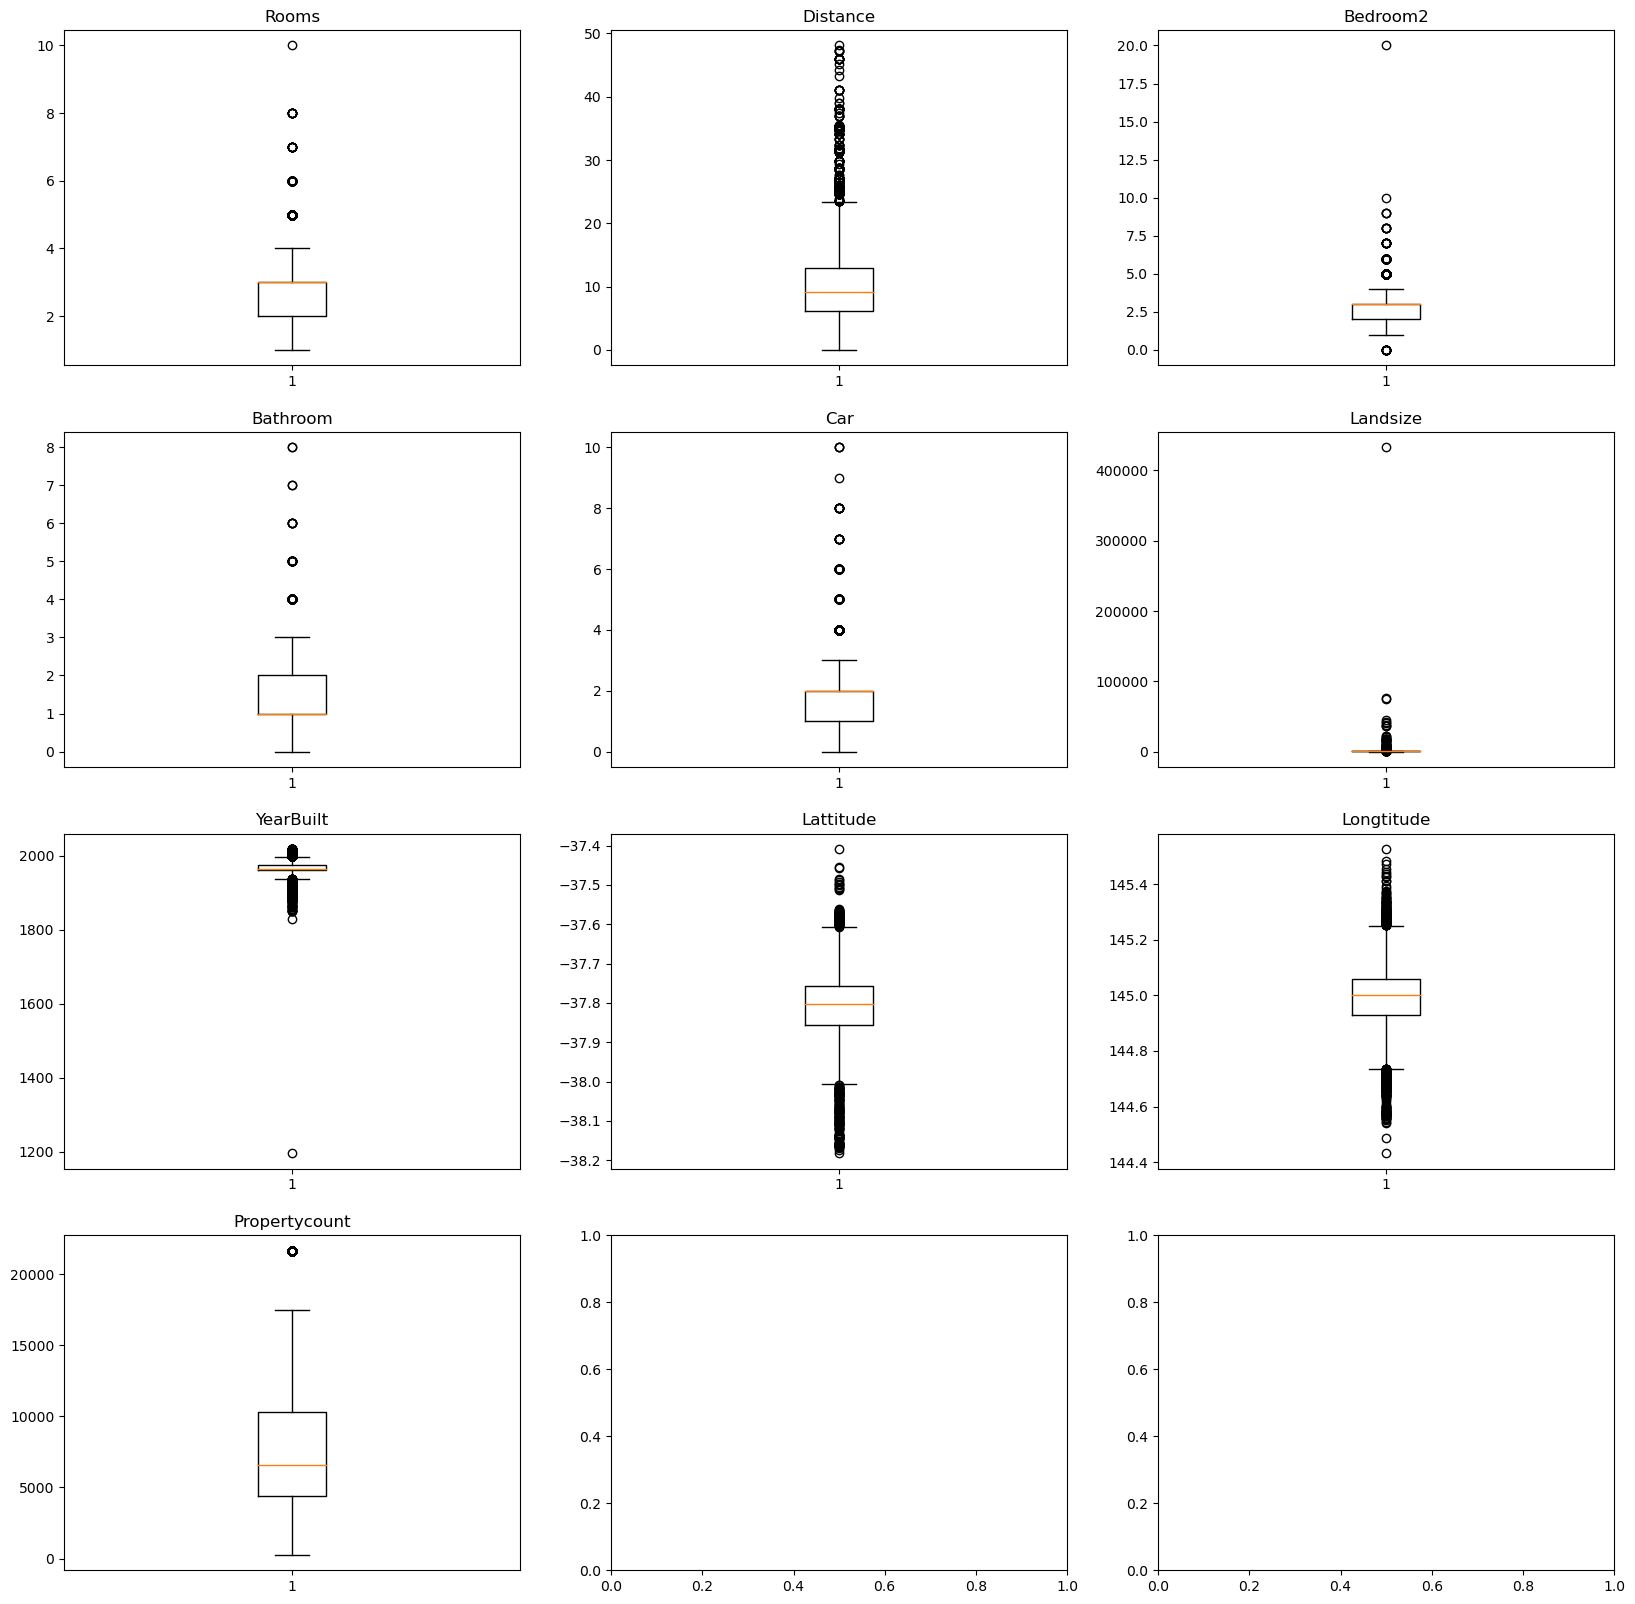

In [219]:
for ax, num_col_name in zip(plt.subplots(4, 3, figsize=(20, 20))[1].flatten(), numerical_cols):
	ax.set_title(num_col_name)
	ax.boxplot(X[num_col_name]) # отметим для себя, что выборсы существуют, но выкидывать не будем, так как knn очень устойчив к выбросам

In [220]:
# Standart Scaler, Масштабирование признаков 

In [221]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X = scaler.fit_transform(X) # так делать плохо, образуется утечка данных, нужно испольховать sklearn.piplines 

In [222]:
# Обучение knn и кроссвалидация 

In [223]:
from sklearn.neighbors import KNeighborsRegressor
knn = KNeighborsRegressor(5)

In [224]:
from sklearn.model_selection import KFold
from sklearn.metrics import mean_squared_error
from tqdm import tqdm 

cv = KFold(n_splits=5)
errors = []

for train_idx, val_idx in tqdm(cv.split(X)):
	X_train, y_train = X[train_idx], y[train_idx]
	X_val, y_val = X[val_idx], y[val_idx]

	knn.fit(X_train, y_train)
	pred_val = knn.predict(X_val)
	errors.append(mean_squared_error(y_val, pred_val))
	

print(f'Metrics\nErrors = {errors}\nRMSE = {np.mean(errors)**0.5}')

5it [00:00, 11.30it/s]

Metrics
Errors = [152221806665.53598, 139861572444.4555, 151519668222.4149, 125227553024.8087, 140353827914.53134]
RMSE = 376612.3811750608


In [225]:
# Второй способ - cross_val_score (более простой)

In [227]:
from sklearn.model_selection import cross_val_score

scores = cross_val_score(knn, X, y, cv=5)
scores 

array([0.65407176, 0.67052368, 0.64918061, 0.63588163, 0.63816049])

In [228]:
from sklearn.metrics import make_scorer

scorer = make_scorer(lambda y_true, y_pred: mean_squared_error(y_true, y_pred), greater_is_better=False)
errors = cross_val_score(knn, X, y, scoring=scorer)

print(f'Metrics\nErrors = {errors}\nRMSE = {np.mean(-errors)**0.5}')

Metrics
Errors = [-1.52221807e+11 -1.39861572e+11 -1.51519668e+11 -1.25227553e+11
 -1.40353828e+11]
RMSE = 376612.3811750608


In [229]:
# Финальный шаг
knn.fit(X, y)

KNeighborsRegressor()